In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

veri dosyası: csv formatında

In [10]:
newData=pd.read_csv("train.csv")

Excel tablosuna benzer şekilde göstermek için;

In [12]:
newDataDF=pd.DataFrame(newData)

In [13]:
newDataDF

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Veri setimizin boyutunu kontrol edelim

In [18]:
newDataDF.shape

(42000, 785)

verileri ayır

In [21]:
y = newDataDF["label"].values
x = newDataDF.drop('label', axis=1).values / 255.0  # Normalizasyon
m, n = x.shape

##  Veriyi rastgele karıştırır

In [24]:

np.random.seed(1)  
x, y = x[np.random.choice(x.shape[0], size=x.shape[0], replace=False)], y[np.random.choice(y.shape[0], size=y.shape[0], replace=False)]

#Dogrulamak icin 1000 satırdaki elemanları sectik ve tranpoze işlemine tabi tutduk

In [26]:
x_dev = x[:1000].T
y_dev = y[:1000]
X_train = x[1000:].T
Y_train = y[1000:]

Eğitecegimiz eğitim setimizin boyutunu kontrol ettik

In [30]:
_, m_train = X_train.shape

## Model parametreleri ve Egitmek için gerekli fonksiyonlar

In [33]:
def parametreleri_baslat():
    w_gizli = np.random.rand(10, 784) - 0.5 
    b_gizli = np.random.rand(10, 1) - 0.5  
    w_cikis = np.random.rand(10, 10) - 0.5  
    b_cikis = np.random.rand(10, 1) - 0.5  
    return w_gizli, b_gizli, w_cikis, b_cikis

Tahmin:  [3]
Etiket:  1


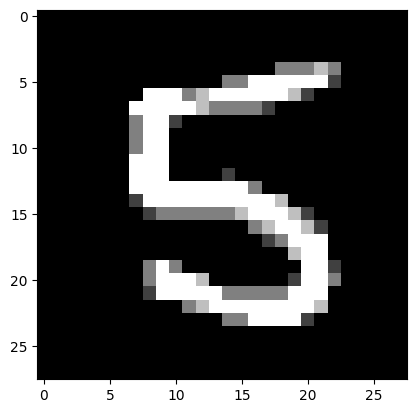

Tahmin:  [4]
Etiket:  9


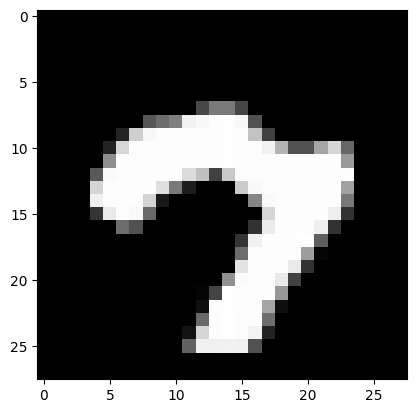

In [35]:
def relu_aktivasyonu(z):
    return np.maximum(z, 0)  

def softmax_aktivasyonu(z):
    exp_z = np.exp(z - np.max(z)) 
    return exp_z / np.sum(exp_z, axis=0)

def ileri_yayilim(w_gizli, b_gizli, w_cikis, b_cikis, x):
    z1 = w_gizli.dot(x) + b_gizli  
    a1 = relu_aktivasyonu(z1)  
    z2 = w_cikis.dot(a1) + b_cikis  
    a2 = softmax_aktivasyonu(z2)  
    return z1, a1, z2, a2

def one_hot(y, num_classes):
    one_hot_matrix = np.zeros((num_classes, y.size))
    one_hot_matrix[y, np.arange(y.size)] = 1
    return one_hot_matrix

def relu_türev(z):
    return z > 0  

def geri_yayilim(z1, a1, z2, a2, w_cikis, x, y, num_classes):
    one_hot_y = one_hot(y, num_classes)
    dz2 = a2 - one_hot_y  
    dw2 = dz2.dot(a1.T) / x.shape[1]  
    db2 = np.sum(dz2, axis=1, keepdims=True) / x.shape[1]  
    dz1 = w_cikis.T.dot(dz2) * relu_türev(z1)  
    dw1 = dz1.dot(x.T) / x.shape[1]  
    db1 = np.sum(dz1, axis=1, keepdims=True) / x.shape[1]  
    return dw1, db1, dw2, db2

def parametreleri_guncelle(w_gizli, b_gizli, w_cikis, b_cikis, dw1, db1, dw2, db2, alpha):
    w_gizli -= alpha * dw1  
    b_gizli -= alpha * db1 
    w_cikis -= alpha * dw2  
    b_cikis -= alpha * db2  
    return w_gizli, b_gizli, w_cikis, b_cikis

def tahmin_yap(x, w_gizli, b_gizli, w_cikis, b_cikis):
    _, _, _, a2 = ileri_yayilim(w_gizli, b_gizli, w_cikis, b_cikis, x)
    predictions = np.argmax(a2, axis=0)
    return predictions

def tahminleri_test_et(index, w_gizli, b_gizli, w_cikis, b_cikis):
    current_image = X_train[:, index][: , None]
    predictions = tahmin_yap(current_image , w_gizli , b_gizli , w_cikis , b_cikis)
    
    label = Y_train[index]
    
    print("Tahmin: ", predictions)
    print("Etiket: ", label)
    
    current_image = current_image.reshape((28 , 28)) * 255
    plt.gray()
    plt.imshow(current_image , interpolation='nearest')
    plt.show()


w_gizli , b_gizli , w_cikis , b_cikis = parametreleri_baslat()

# Test etme
tahminleri_test_et(0 , w_gizli , b_gizli , w_cikis , b_cikis)
tahminleri_test_et(1 , w_gizli , b_gizli , w_cikis , b_cikis)


In [ ]:
def train_model(X_train, Y_train, X_dev, Y_dev, alpha, num_iterations, num_classes):
    w_gizli, b_gizli, w_cikis, b_cikis = parametreleri_baslat()
    for i in range(num_iterations):
        for j in range(X_train.shape[1]):  
            x = X_train[:, j:j+1]
            y = Y_train[j]
            
            # İleri propagasyon
            z1, a1, z2, a2 = ileri_yayilim(w_gizli, b_gizli, w_cikis, b_cikis, x)
            
            # Geri propagasyon
            dw1, db1, dw2, db2 = geri_yayilim(z1, a1, z2, a2, w_cikis, x, y, num_classes)  
            # Parametre güncelleme
            w_gizli, b_gizli, w_cikis, b_cikis = parametreleri_guncelle(w_gizli, b_gizli, w_cikis, b_cikis, dw1, db1, dw2, db2, alpha)
        
        # Her 100 iterasyonda doğruluk kontrolü
        if i % 100 == 0:
            predictions = tahmin_yap(X_dev, w_gizli, b_gizli, w_cikis, b_cikis)
            accuracy = np.mean(predictions == Y_dev)
            print(f"Iterasyon {i}: Geliştirme setindeki doğruluk: {accuracy * 100:.2f}%")
    
    return w_gizli, b_gizli, w_cikis, b_cikis  


In [ ]:
num_classes = 10  
w_gizli, b_gizli, w_cikis, b_cikis = train_model(X_train, Y_train, x_dev, y_dev, alpha=0.1, num_iterations=1000, num_classes=num_classes)


Iterasyon 0: Geliştirme setindeki doğruluk: 12.30%
Iterasyon 100: Geliştirme setindeki doğruluk: 12.40%
Iterasyon 200: Geliştirme setindeki doğruluk: 12.40%
Iterasyon 300: Geliştirme setindeki doğruluk: 12.30%
Iterasyon 400: Geliştirme setindeki doğruluk: 12.30%
Iterasyon 500: Geliştirme setindeki doğruluk: 12.30%
